In [1]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt  

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/wage1.csv')
data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [4]:
data.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [11]:
data[ pd.isnull(data['tenure'])].head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq


In [13]:
data['tenure'].unique() 

array([ 0,  2, 28,  8,  7,  3,  4, 21, 15, 10,  6, 13,  9,  1,  5, 16, 12,
       20, 23, 34, 19, 24, 39, 22, 11, 25, 30, 26, 44, 17, 31, 18, 33, 14])

In [14]:
data = data.fillna(-1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
data

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [18]:
X = data [['tenure', 'female','numdep']]
X = pd.get_dummies (X, drop_first=True)
print()
X.head()

,tenure,female,numdep
0,0,1,2
1,2,1,3
2,0,0,2
3,28,0,0
4,2,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit( data['numdep'])

LabelEncoder()

In [21]:
X

,tenure,female,numdep
0,0,1,2
1,2,1,3
2,0,0,2
3,28,0,0
4,2,0,1
...,...,...,...
521,2,1,2
522,0,1,3
523,18,0,3
524,1,0,0


In [22]:
y = (data['trade']>0).astype('int32')
y.head()

0    0
1    0
2    1
3    0
4    0
Name: trade, dtype: int32

<Axes: >

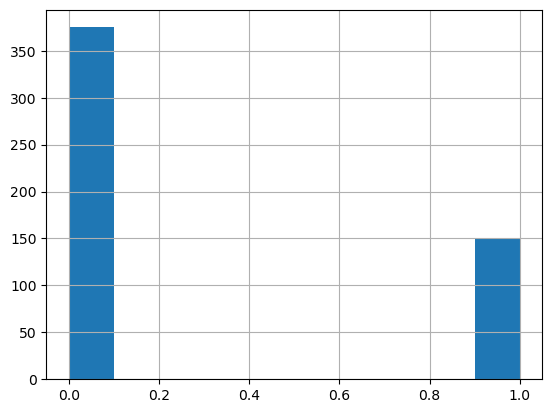

In [23]:
y.hist()

In [24]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, class_weight='balanced'))

In [25]:
model = LogisticRegression()

In [26]:
y

0      0
1      0
2      1
3      0
4      0
      ..
521    0
522    1
523    0
524    0
525    0
Name: trade, Length: 526, dtype: int32

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train

,tenure,female,numdep
69,2,1,4
477,12,0,1
307,2,1,2
173,4,1,1
237,0,0,0
...,...,...,...
71,2,0,3
106,11,0,2
270,0,1,1
435,0,1,2


In [29]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [30]:
predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [31]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [32]:
model.predict_proba(X_test)

array([[0.77910532, 0.22089468],
       [0.87923606, 0.12076394],
       [0.70713543, 0.29286457],
       [0.82272008, 0.17727992],
       [0.66442391, 0.33557609],
       [0.70200867, 0.29799133],
       [0.71830619, 0.28169381],
       [0.65287858, 0.34712142],
       [0.65287858, 0.34712142],
       [0.60648917, 0.39351083],
       [0.74748705, 0.25251295],
       [0.60042824, 0.39957176],
       [0.77415504, 0.22584496],
       [0.8397308 , 0.1602692 ],
       [0.62990247, 0.37009753],
       [0.7374555 , 0.2625445 ],
       [0.5702083 , 0.4297917 ],
       [0.63006518, 0.36993482],
       [0.69668317, 0.30331683],
       [0.62990247, 0.37009753],
       [0.72816577, 0.27183423],
       [0.68099741, 0.31900259],
       [0.72830391, 0.27169609],
       [0.76600171, 0.23399829],
       [0.73794122, 0.26205878],
       [0.50840015, 0.49159985],
       [0.84951678, 0.15048322],
       [0.72739188, 0.27260812],
       [0.80706668, 0.19293332],
       [0.73315024, 0.26684976],
       [0.

In [33]:
model.score(X_train, y_train) 

0.6952380952380952

In [34]:
from sklearn.metrics import f1_score

In [35]:
f1_score(y_test, model.predict(X_test))

0.0

In [36]:
f1_score(y_train, model.predict(X_train))

0.0

In [37]:
model.score(X_test,y_test)

0.7735849056603774